In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [8]:
col_names = ["id", "age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage", "pep"]
# load dataset
bank = pd.read_csv("bank.csv")
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [9]:
# Check null or missing data
bank.isnull().sum()

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

In [10]:
label_encoder = LabelEncoder()
# encoding for X
encoding_column = ["sex", "region", "married", "car", "save_act", "current_act", "mortgage"]
non_encoding_column = ["age", "income", "children"]
for enc in encoding_column: 
    bank[enc] = pd.to_numeric(label_encoder.fit_transform(bank[enc]))
# for non_enc in non_encoding_column: 
#     bank[non_enc] = bank[non_enc].replace(' ', 0).astype(str).astype(float)
    
# encoding for y
bank["pep"] = pd.to_numeric(label_encoder.fit_transform(bank["pep"]))

# X = bank[["age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage"]] # Features
X = bank.drop(["id","pep"],axis=1)
y = bank[["pep"]] # Target variable

In [12]:
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,0,0,17546.0,0,1,0,0,0,0,1
1,ID12102,40,1,3,30085.1,1,3,1,0,1,1,0
2,ID12103,51,0,0,16575.4,1,0,1,1,1,0,0
3,ID12104,23,0,3,20375.4,1,3,0,0,1,0,0
4,ID12105,57,0,1,50576.3,1,0,0,1,0,0,0


In [11]:
bank.describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.395000,0.500000,1.231667,27524.031217,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.424947,0.500417,1.286113,12899.468246,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.000000,0.500000,1.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,55.250000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,63130.100000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
bank = bank.drop(columns=["id"])
correlation_matrix = bank.corr()

In [15]:
correlation_matrix

,age,region,income,children,sex_1,married_1,car_1,save_act_1,current_act_1,mortgage_1,pep_1
age,1.000000,0.011167,0.752726,0.023572,-0.090081,0.010394,0.077733,0.184389,-0.035312,-0.016154,0.173825
region,0.011167,1.000000,-0.000212,0.011520,-0.035018,0.006188,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.752726,-0.000212,1.000000,0.036761,-0.023845,-0.008386,0.081556,0.266164,0.031616,-0.014662,0.221991
children,0.023572,0.011520,0.036761,1.000000,-0.014206,-0.048716,0.036455,0.041536,0.006238,-0.074339,-0.057663
sex_1,-0.090081,-0.035018,-0.023845,-0.014206,1.000000,0.021110,0.006667,0.007207,-0.019466,0.066465,0.046843
married_1,0.010394,0.006188,-0.008386,-0.048716,0.021110,1.000000,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
car_1,0.077733,0.021860,0.081556,0.036455,0.006667,-0.009571,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act_1,0.184389,0.084382,0.266164,0.041536,0.007207,0.028604,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act_1,-0.035312,-0.013356,0.031616,0.006238,-0.019466,-0.059996,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage_1,-0.016154,0.026083,-0.014662,-0.074339,0.066465,-0.021711,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


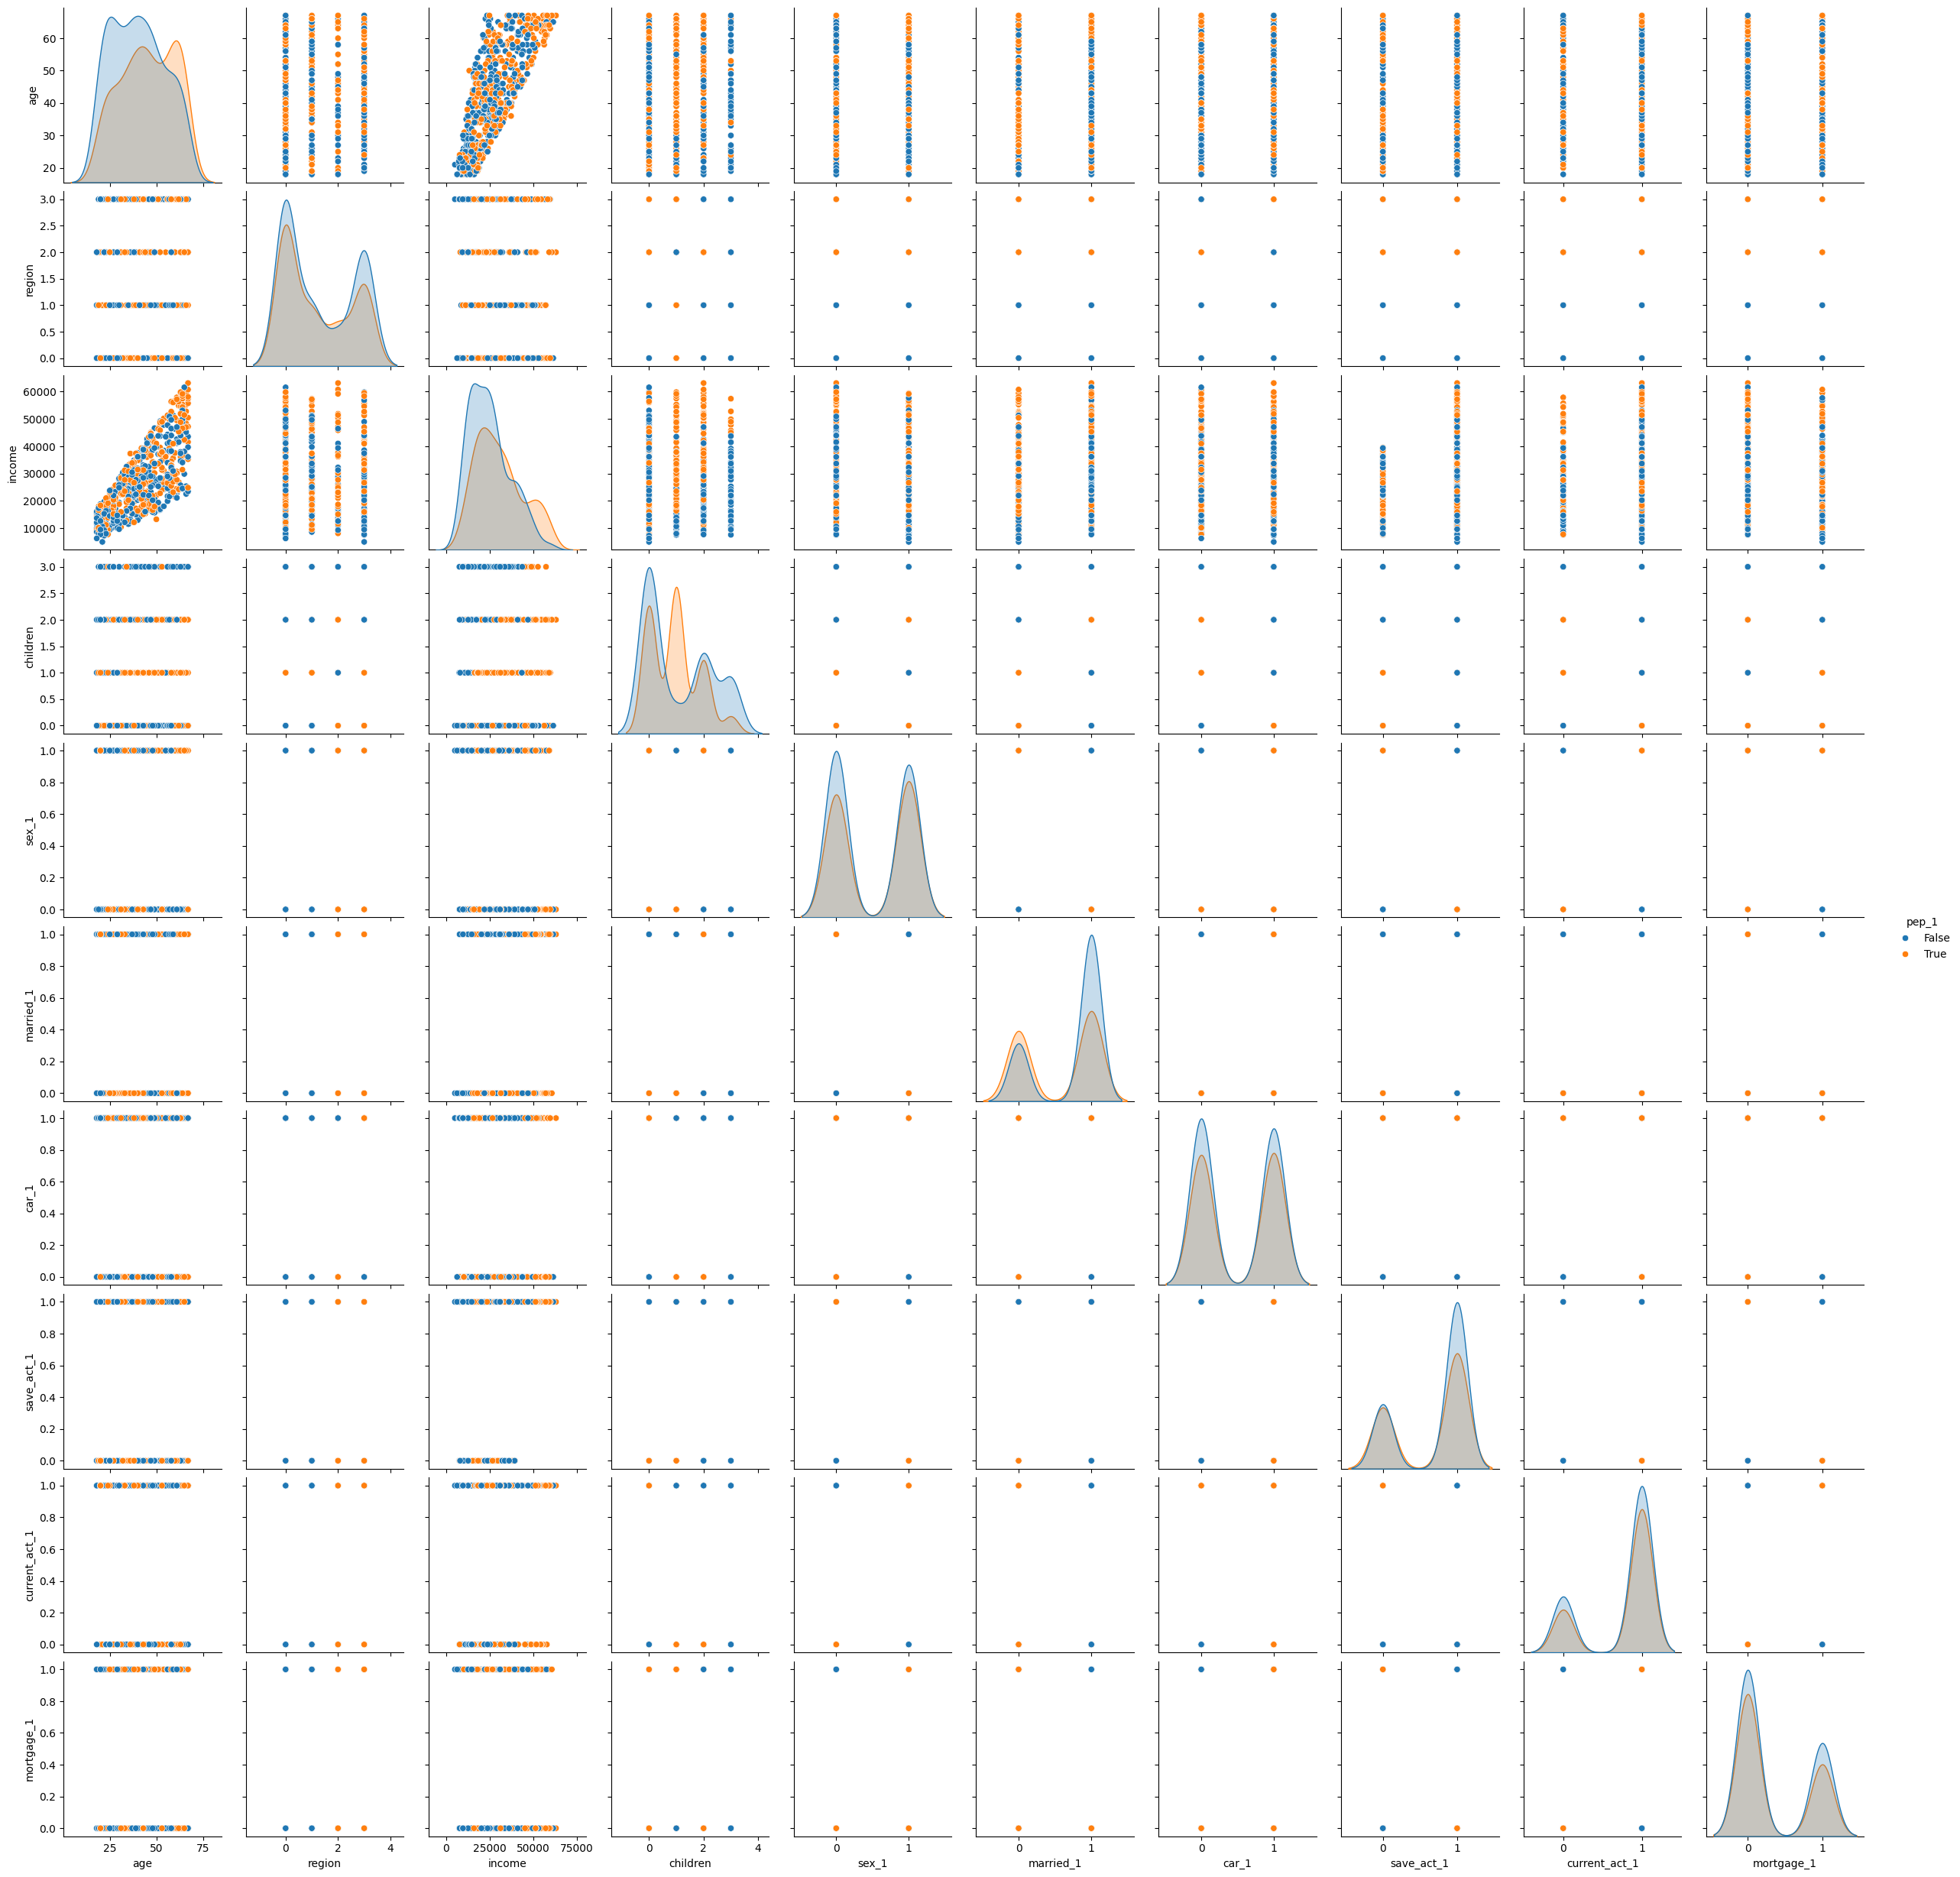

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(bank, hue="pep_1")